<a href="https://colab.research.google.com/github/naomori/dl4us/blob/master/lesson1_sec4_exercise_myeself.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson1 手書き文字認識をしよう（ニューラルネットワーク入門）

## 目次

- 3.4の解答
- Section4 実装②
  - 4.1 Fashion MNIST
  - 4.2 実装

## 3.4の解答

1. 損失関数のパラメータ微分のことを何というか  
  ①スケーリング　**②勾配**　③学習率　④SGD
2. 活性化関数の選択により対処可能な問題を何というか  
  **①勾配消失問題**　②次元の呪い　③固有値問題　④バイアス―バリアンストレードオフ
3. 損失関数にペナルティ項を加え、パラメータの自由度を下げる手法を何というか  
  ①モーメンタム　②部分空間法　**③正則化**　④誤差逆伝播法
4. 過学習への対処としてふさわしくないものはどれか  
  ①ドロップアウト　**②スケーリング**　③ElasticNet　④早期終了

## Section4 実装②

最後に、この章の復習として、ファッションデータの分類をMLPを用いて行ってみましょう。

### 4.1 Fashion MNIST

In [1]:
# データのロード
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
# データセットの大きさ確認
print(x_train.shape) # 訓練データのサイズ
print(x_test.shape) # テストデータのサイズ

(60000, 28, 28)
(10000, 28, 28)


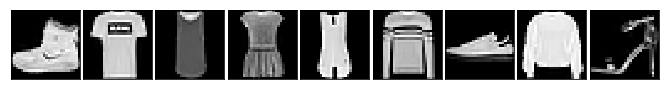

In [3]:
# データセットの表示
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

### 4.2 実装

In [0]:
# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) /255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
# モデル構築
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

model.add(Dense(512, input_shape=(784,), activation='relu', kernel_initializer='he_normal'))
model.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 比較用にsection2と類似のモデルを準備
model0 = Sequential()

model0.add(Dense(units=256, input_shape=(784,)))
model0.add(Activation('relu'))
model0.add(Dense(units=100))
model0.add(Activation('relu'))
model0.add(Dense(units=10))
model0.add(Activation('softmax'))

model0.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

W0828 05:48:54.993345 140035382110080 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
# 学習
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=10, verbose=1)

model.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model0.fit(x_train, y_train, batch_size=1000, verbose=2, epochs=10, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 1s - loss: 0.8721 - acc: 0.6928 - val_loss: 0.4963 - val_acc: 0.8261
Epoch 2/10
60000/60000 - 1s - loss: 0.4656 - acc: 0.8363 - val_loss: 0.4488 - val_acc: 0.8419
Epoch 3/10
60000/60000 - 1s - loss: 0.4012 - acc: 0.8558 - val_loss: 0.3904 - val_acc: 0.8575
Epoch 4/10
60000/60000 - 1s - loss: 0.3639 - acc: 0.8686 - val_loss: 0.3678 - val_acc: 0.8681
Epoch 5/10
60000/60000 - 1s - loss: 0.3372 - acc: 0.8777 - val_loss: 0.3634 - val_acc: 0.8670
Epoch 6/10
60000/60000 - 1s - loss: 0.3144 - acc: 0.8846 - val_loss: 0.3569 - val_acc: 0.8702
Epoch 7/10
60000/60000 - 1s - loss: 0.3011 - acc: 0.8898 - val_loss: 0.3407 - val_acc: 0.8763
Epoch 8/10
60000/60000 - 1s - loss: 0.2888 - acc: 0.8938 - val_loss: 0.3417 - val_acc: 0.8754
Epoch 9/10
60000/60000 - 1s - loss: 0.2779 - acc: 0.8971 - val_loss: 0.3400 - val_acc: 0.8802
Epoch 10/10
60000/60000 - 1s - loss: 0.2604 - acc: 0.9046 - val_loss: 0.3390 - val_acc: 0.8810
Train on 

In [9]:
# 性能評価
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
score0 = model0.evaluate(x_test, y_test, verbose=1)
print('Test loss by model0:', score0[0])
print('Test accuracy by model0:', score0[1])

10000/10000 [==============================] - 1s 88us/sample - loss: 0.3390 - acc: 0.8810
Test loss: 0.33903713710308075
Test accuracy: 0.881
10000/10000 [==============================] - 1s 82us/sample - loss: 0.6640 - acc: 0.7752
Test loss by model0: 0.6639621399879455
Test accuracy by model0: 0.7752
